In [6]:
import numpy as np
from qclib.gates.ldmcu import Ldmcu
from qclib.gates.ldmcu_approx import LdmcuApprox
from qiskit import QuantumRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt
from qclib.util import get_cnot_count

In [13]:
unitary = np.array([[0,1], [1,0]])
error = 1e-3

ldmcu_approx_test = LdmcuApprox(unitary, num_controls=100, error=error)
base_ctrl_qubits = ldmcu_approx_test._get_num_base_ctrl_qubits(unitary, error)

num_control = 12

controls_base = QuantumRegister(num_control)
target = QuantumRegister(1)

print('Com error = %.6f, o circuito terá %d controles' %(error, base_ctrl_qubits))

Com error = 0.001000, o circuito terá 13 controles


## Comparação mxc

In [14]:
u = np.array([[0,1], [1,0]])
error=1e-3
ldmcu_approx_dummy = LdmcuApprox(u, num_controls=100, error=error)
base_ctrl_qubits_mcx = ldmcu_approx_dummy._get_num_base_ctrl_qubits(u,error)
print(base_ctrl_qubits_mcx)

13


## gráfico para artigo Analítico (theorem 1 versus theorem 3)

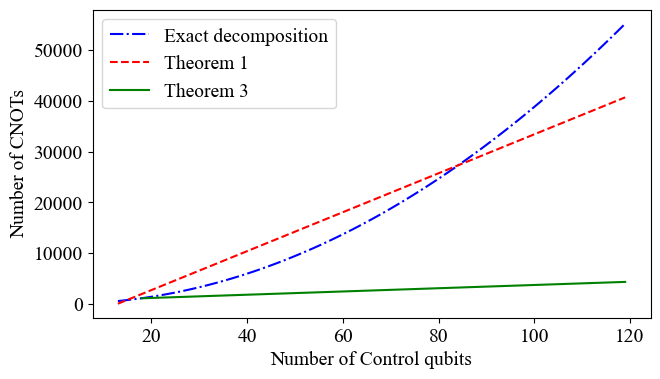

In [18]:
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
n_base = base_ctrl_qubits_mcx
x = np.arange(n_base, 120)
x_t3 = np.arange(n_base+5, 120)
y_0 = custo_pra(x)
y_1 = custo_teorema1(n_base, x)
# y_2 = [custo_terema3(n_base, xi - n_base) for xi in x_t3] #custo_terema3(n_base, x_t3)
y_2 = custo_teorema3(x_t3) #custo_terema3(n_base, x_t3)

plt.plot(x, y_0, 'b-.')
plt.plot(x, y_1, 'r--')
plt.plot(x_t3, y_2, 'g-')
#plt.plot(22, custo_pra(22),  "ro") #interseção
plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.legend(
    ('Exact decomposition', 'Theorem 1', 'Theorem 3'),
    loc = 'upper left', shadow=False
)

plt.savefig('analitico_pra_t1_t3.svg', dpi=300)

## Comparando com Barenco Approx

In [26]:
#def custo_terema3(base, extra):
#    return 4*(base-1)**2 + 96*base+32*extra-208 - 32*(base - 2)

def custo_terema1(base, extra):
    return -28*(base-1)**2 + 2*(base-1)*(16*extra - 40)

def custo_pra(n):
    return 4*n**2 - 12*n + 10

In [27]:
def get_k_barenco(epsilon):
    quotient = np.pi/epsilon
    return int(np.ceil(np.log2(quotient)))

In [28]:
u = np.array([[0,1], [1,0]])
error=1e-3
ldmcu_approx_dummy = LdmcuApprox(u, num_controls=100, error=error)
base_ctrl_qubits_mcx = ldmcu_approx_dummy._get_num_base_ctrl_qubits(u,error)
print(base_ctrl_qubits_mcx)
k_barenco = get_k_barenco(error)
print(k_barenco)

13
12


In [29]:
def custo_barenco_approx(n, k):
    return 32*k*n-16*k**2-60*k

In [30]:
def c_barenco_rec(n,i,k):
    n_ctrl = n-i-1
    if(n_ctrl == n-k-1):
        return 0
    #if(i==k): return 0
    return 32*(n-i)-76+c_barenco_rec(n, i+1, k)
    

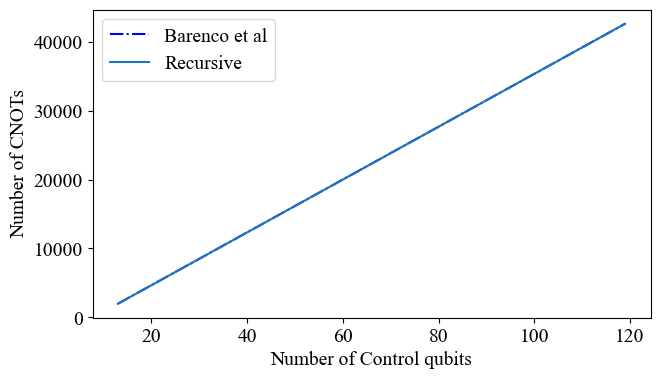

In [47]:
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
n_base = base_ctrl_qubits_mcx
x = np.arange(n_base, 120)
x_t3 = np.arange(n_base+5, 120)
y_0 = custo_barenco_approx(x, k_barenco)
y_4 = [c_barenco_rec(xi, 0, k_barenco) for xi in x]
y_1 = custo_terema1(n_base, x)
y_2 = [custo_terema3(n_base, xi - n_base) for xi in x_t3] #custo_terema3(n_base, x_t3)

plt.plot(x, y_0, 'b-.')
plt.plot(x, y_4)

#plt.plot(22, custo_pra(22),  "ro") #interseção
plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.legend(
    ('Barenco et al', 'Recursive'),
    loc = 'upper left', shadow=False
)


In [50]:
a = np.arange(10,50)
diff = [(custo_barenco_approx(ai, k_barenco)-c_barenco_rec(ai, 0, k_barenco)) for ai in a]
print(diff)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


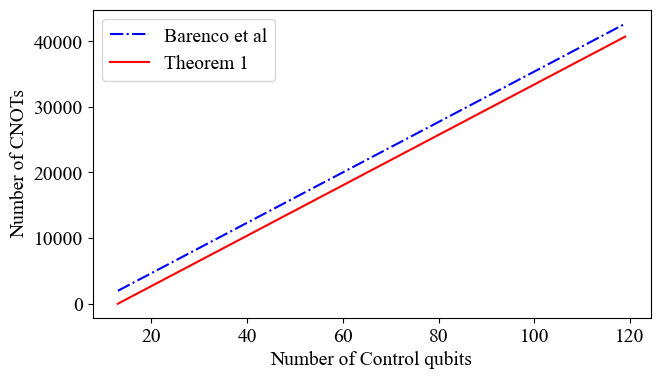

In [54]:
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})
n_base = base_ctrl_qubits_mcx
x = np.arange(n_base, 120)
x_t3 = np.arange(n_base+5, 120)
y_0 = [c_barenco_rec(xi, 0, k_barenco) for xi in x]
y_1 = custo_terema1(n_base, x)
y_2 = [custo_terema3(n_base, xi - n_base) for xi in x_t3] #custo_terema3(n_base, x_t3)

plt.plot(x, y_0, 'b-.')
plt.plot(x, y_1, 'r-')
#plt.plot(x_t3, y_2, 'g-')

#plt.plot(22, custo_pra(22),  "ro") #interseção
plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.legend(
    ('Barenco et al', 'Theorem 1', 'Theorem 3'),
    loc = 'upper left', shadow=False
)

plt.savefig('barenco_approx_compare.svg', dpi=300)
plt.savefig('barenco_approx_compare.png', dpi=300)

In [52]:
a = np.arange(20,50)
diff = [(custo_terema1(n_base,ai)-c_barenco_rec(ai, 0, k_barenco)) for ai in a]
print(diff)

[-1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968, -1968]
